# Nonlinear Transforms for Linear Models
In this exercise you will experiment with nonlinear transforms for
adding expressive power to our linear models. 

As in the lectures the assignment considers adding polynomial features. 
Download the file **code_nonlinear.py**, which is the file you are going to work with.
If you want you are of course welcome to copy the code from this file into this notebook in any way you like.

## Task 1: Plot the data (and hyperplanes)
Your first task is to load and plot all of the data sets. The input domain of the point set is $[-1,1] \times [-1,1]$.
Write code to plot all five data sets in plot_data using scatter plots in xrange and yrange set to $[-1, 1]$, so you can see what you what you are working with.

**HINT: For some help on plotting it see below.**

* Complete the method **plot_data**

To test it, just call the function.
From the commandline this is **python3 code_nonlinear.py -plot**

We also need to be able to plot the decision boundary found by the perceptron learning algorithm. You can copy this from the hyperplane exercise.
* Complete the method **plot_hyperplane**





Data sets in D ['X1', 'y1', 'y4', 'y2', 'y3', 'X2', 'X4', 'X3']
First data set looks like this - the four data sets are (X1, y1), ..., (X4, y4)


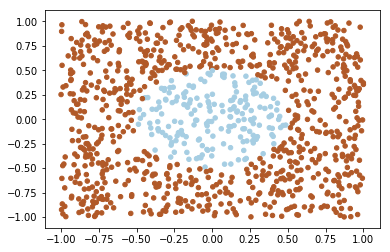

In [1]:
# Enable plotting directly in the notebook
%matplotlib inline
# import NumPy and MatplotLib pyplot
import numpy as np
import matplotlib.pyplot as plt
import os
from code_nonlinear import load_data

D = load_data()
print('Data sets in D', [x for x in D.keys()])
X = D['X1']
y = D['y1']
print('First data set looks like this - the four data sets are (X1, y1), ..., (X4, y4)')
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()
    

## Task 2: Perceptron Algorithm 
We will use the perceptron learning algorithm. As you can see from your plots above, the data sets are not linearly separable as given.
Since we may want to run the perceptron algorithm, you should ensure the algorithm runs only for a limited number of iterations and return the best solution found so far (The pocket algorithm).

* Complete the class PerceptronClassifier (methods **fit**, **predict** and **score**)

You can test it on a linear separable data set by calling test_pla_train() 

From the commandline this is invoked by **python3 code_nonlinear.py -platest**


## Task 3: Square Transform
We denote a feature transform by $\phi$. In the lectures we showed you a simple non linear transform that was able to separate a simple circular data set in feature space.  This was the transform $\phi(x_1,x_2) = (x_1^2,x_2^2)$.

* Implement the square transform in the method **square_transform** 

you can est everything with **python3 code_nonlinear.py -square** or call **plot_square_transform**

# Contour plots

Now we are going to visualize the decision boundary in the original input space. That is, we need to plot the decision boundary under the inverse image of the feature transformation $\phi^{-1}$. When $\phi$ is not just a very simple transformation, this is not a very easy task. We will circumvent this difficulty by making use of contour plots.

Here is a simple example of a contour plot that plots $\phi^{-1}(0)$ in the input range $[-1,1] \times [-1,1]$, where $\phi(x,y) = x^4 - y^3 - xy$.


First, we must evaluate $\phi$ on a set of coordinates in $[-1, 1] \times [-1, 1]$. Here's a slow way of achieving this using for-loops:

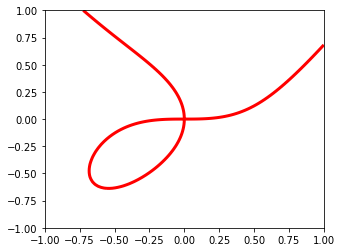

In [12]:
# Make a set of x- and y-coordinates on which we evaluate phi.
xs = ys = np.linspace(-1, 1, 100)
# Make a 2D-array where phi_values[i, j] is the value of phi at x[j], y[i].
phi_values = np.zeros((len(ys), len(xs)))
for i in range(len(ys)):
    for j in range(len(xs)):
        x = xs[j]
        y = ys[i]
        phi_values[i, j] = x ** 4 - y ** 3 - x*y
# Plot phi.
plt.figure(figsize=(5, 4))
plt.contour(xs, ys, phi_values, [0], colors='r', linewidths=3)
plt.show()

We can avoid the above for-loops and make a vectorized solution using `np.meshgrid` instead. This will be much faster when we have many coordinates on which we want to evaluate $\phi$.

The function `np.meshgrid` can turn our two arrays `xs` and `ys` (of $x$- and $y$-coordinates) into 2D-arrays `xm` and `ym` such that `xm[i, j] == xs[j]` and `ym[i, j] == ys[i]`. This is how `np.meshgrid` works on a small example where `xs = [10, 20, 30]` and `ys = [15, 16]`:

In [13]:
# Use np.meshgrid to make arrays of coordinates.
a, b = np.meshgrid([10,20,30], [15,16])
print(a.shape)  # a and b are (2, 3)-arrays
print(a)
print(b)

(2, 3)
[[10 20 30]
 [10 20 30]]
[[15 15 15]
 [16 16 16]]


When we use `np.meshgrid` on our big coordinate sets `xs` and `ys` we cannot print the output directly, but we can verify that the output is as expected on the 40th row, 20th column:

In [14]:
xm, ym = np.meshgrid(xs, ys)
(xm[40, 20], ym[40, 20]) == (xs[20], ys[40])

True

With `xm` and `ym` it is easy to evaluate $\phi$ on all coordinates in `xs × ys`:

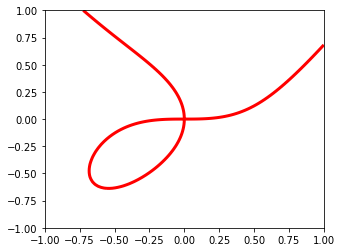

In [15]:
zm = xm**4 - ym**3 - xm*ym
plt.figure(figsize=(5, 4))
plt.contour(xs, ys, zm, [0], colors='r', linewidths=3)

## Task 4: Contour Plots

Now that we know how to draw contour plots we can plot the decision boundaries on the original input space.
With contour plots we just need to compute a matrix consiting of the entries $w_{pla} \cdot \phi(x,y)$, where $x$ and $y$ range over the x and y coordinates. Plotting the $(x,y)$ when this is zero is exactly the decision boundary.

Aim to make a vectorized solution! If you have built coordinate grids as above using meshgrid, then `xm` and `ym` are $100 \times 100$ arrays. You can then build a $d \times 100 \times 100$ array where the first index is indexing the coordinates of $\phi(x,y)$ (and $d$ is the dimension of the feature transform) and the other two indices are $x$ and $y$. Here the NumPy command <tt>array</tt> is useful. 

Reshape the array to a $d \times 10000$ array, make a vector matrix product with $w_{pla}$ obtaining a $1 \times 10000$ array and reshaping back to a $100 \times 100$ array. For this the NumPy <tt>reshape</tt> function is useful.

If this fails try the naive version

* Complete the method **plot_contour** 

You can test with **python3 code_nonlinear.py -contour** or by calling **contour_test()**




## Task 5: General polynomial Transform
As you can tell not all the data sets become linear separable with our current non-linear transform. 
Now you must to come up with a better non-linear transform that makes the data linearly separable in the transformed space. We suggest (wink, wink) you use the general form of polynomials of degree 3, i.e.: $\phi(x_1,x_2) = (x_1^i \; x_2^j \text{  for  } 0 \leq i+j \leq 3)$. This should give $\binom{2+3}{3}=10$ features where one of them is the all ones vector. After that you can experiment with the degree 2 transform as well.

We will apply the transform to all the datasets, run the perceptron learning algorithm, and plot the results.
Actually all you need to do is to implement the fancy transform, since you have already implemented the remaining parts needed we have already put that code togeter for you.

* Complete the method **poly_transform** 

Test your entire algorithm on all data sets by running **python3 code_nonlinear.py -run** or calling the method **run**
    
    


## Task 6:  Linear Regression for Classification

Linear regression computes the linear model (line in 2D) that best approximates the real valued target function.
It works by computing the vector

$$
w_{\textrm{lin}} = \textrm{argmin}_w \sum_i (w^\intercal x_i - y_i)^2.
$$

The labels can be any real numbers.
In our setting (classification) the labels are either $+1$ or $-1$, which is a small subset of the real numbers.
Linear regression finds the best linear fit to these values over the input points.
Compare this to the perceptron linear algorithm, that simply finds *any* linear fit (without considering the distance from the points to the line).

We can use exactly the same method to classify new points, i.e., we compute $\textrm{sign}(w_\textrm{lin}^\intercal x)$.
Notice that this is meaningful in the sense that linear regression tried to fit $+1$ and $-1$, so applying the sign function makes sense.

**Complete the code in LinRegClassifier**


Run **python3 code_nonlinear.py -linreg**  or call method **run_linreg** to run the same code as for the perceptron classifier and see the results.

